### Esercitazione 14 - Ichimoku Cloud
#### Argomenti

* indicatore Ichimoku Cloud
* implementazione di una semplice strategia basata sull'Hichimoku Cloud

L'Ichimoku Cloud è una raccolta di indicatori tecnici che mostrano i livelli di supporto
e resistenza, nonché lo slancio e la direzione del trend. E' realizzato prendendo più medie
e tracciandole su un grafico.
Utilizza i valori ottenuti per calcolare una "nuvola" che tenta di prevedere dove il prezzo
potrebbe trovare supporto o resistenza in futuro.

E' composto da cinque linee, due dei quali comprendono una nuvola in cui la differenza tra le due linee
è ombreggiata. Le linee includono (di default) una media di nove periodi, una media di 26 periodi, una
media di queste due medie, una media di 52 periodi e una linea di prezzo di chiusura ritardata.
La nuvola ottenuta è una parte fondamentale dell'indicatore. Quando il prezzo è al di sotto della nuvola,
la tendenza è al ribasso; quando il prezzo è al di sopra la tendenza è al rialzo.
I segnali di tendenza di cui sopra si rafforzano se la nuvola si muove nella stessa direzione del prezzo.
Ad esempio, durante una tendenza al rialzo, la parte superiore del cloud si sta spostando verso l'alto, o
durante una tendenza al ribasso, la parte inferiore del cloud si sta spostando verso il basso.

Formule per il calcolo delle 5 linee:

* Conversion Line (CL): punto medio delle ultime 9 candele, calcolato sommando la media dei massimi e dei minimi
rilevati nell'intervallo e poi dividendo il risultato per 2
* Base Line (BL): come per la CL ma su 26 periodi
* Leading Span A: (CL + BL) / 2
* Leading Span B: come per la CL ma su 52 periodi
* Lagging Span: prezzo di chiusura tracciato 26 candele indietro

Quando il Leading Span A è in aumento e al di sopra del Leading Span B, questo aiuta a confermare il
trend rialzista e lo spazio tra le linee è tipicamente colorato di verde. Quando il Leading Span A è
in calo e al di sotto del Leading Span B, questo aiuta a confermare la tendenza al ribasso. Lo spazio
tra le righe è in genere colorato di rosso in questo caso.

Si dovrebbe utilizzare Ichimoku Cloud insieme ad altri indicatori tecnici per massimizzare i loro
rendimenti. Ad esempio, questo indicatore è spesso abbinato all'indice di forza relativa (RSI), che
può essere utilizzato per confermare lo slancio in una determinata direzione. È anche importante
esaminare le tendenze più grandi per vedere come si adattano le tendenze più piccole al loro interno.
Ad esempio, durante un trend ribassista molto forte, il prezzo potrebbe spingersi nella nuvola o
leggermente al di sopra, temporaneamente, prima di scendere di nuovo. Concentrarsi solo sull'indicatore
Ichimoku Cloud significherebbe perdere il quadro più ampio.

In [1]:
import matplotlib.pyplot as plt
from Historic_Crypto import  HistoricalData
from datetime import datetime, timedelta
import numpy as np

In [2]:
end_date = datetime.now()
start_date = end_date - timedelta(days=3)
candles = HistoricalData(
    ticker='ETH-EUR',
    granularity=900,
    start_date=start_date.strftime('%Y-%m-%d-%H-%M'),
    end_date=end_date.strftime('%Y-%m-%d-%H-%M'),
    verbose=False
).retrieve_data()

In [3]:
# impostazioni per il calcolo della Ichimoku Cloud

period_1 = 9
period_2 = 26
period_3 = 52

new_idxs =[candles.index[-1] + timedelta(minutes=15)]
for _ in range(period_2 - 1):
    new_idxs.append(new_idxs[-1] + timedelta(minutes=15))

candles = candles.reindex(candles.index.to_list() + new_idxs)
candles.tail(period_3)

,low,high,open,close,volume
time,,,,,
2022-12-07 03:30:00,1203.39,1206.55,1204.14,1205.63,7.560684
2022-12-07 03:45:00,1205.33,1206.48,1206.25,1205.33,3.443634
2022-12-07 04:00:00,1205.15,1205.92,1205.46,1205.92,5.683734
2022-12-07 04:15:00,1205.04,1207.96,1205.42,1207.92,17.229875
2022-12-07 04:30:00,1206.00,1208.00,1207.75,1206.35,2.217332
2022-12-07 04:45:00,1204.93,1207.09,1205.78,1207.09,9.479047
2022-12-07 05:00:00,1205.19,1206.59,1206.59,1206.01,3.553169
2022-12-07 05:15:00,1203.68,1206.33,1206.24,1203.68,4.842022
2022-12-07 05:30:00,1202.57,1204.88,1202.97,1204.10,14.455854


In [4]:
# calcolo della Ichimoku Cloud

candles['conv_line'] = (candles['high'].rolling(window=period_1).max() + candles['low'].rolling(window=period_1).min()) / 2
candles['base_line'] = (candles['high'].rolling(window=period_2).max() + candles['low'].rolling(window=period_2).min()) / 2
candles['lead_span_a'] = ((candles['conv_line'] + candles['base_line']) / 2).shift(period_2)
candles['lead_span_b'] = ((candles['high'].rolling(window=period_3).max() + candles['low'].rolling(window=period_3).min()) / 2).shift(period_2)
candles['lagg_span'] = candles['close'].shift(-period_2)

candles = candles[period_3 + period_2:]

candles.loc[candles['lead_span_a'] > candles['lead_span_b'], 'lead_colors'] = 'green'
candles.loc[candles['lead_span_a'] <= candles['lead_span_b'], 'lead_colors'] = 'red'

c = candles['lead_colors'].to_list()

candles.tail(period_3)

,low,high,open,close,volume,conv_line,base_line,lead_span_a,lead_span_b,lagg_span,lead_colors
time,,,,,,,,,,,
2022-12-07 03:30:00,1203.39,1206.55,1204.14,1205.63,7.560684,1207.020,1208.545,1192.7200,1193.425,NaN,red
2022-12-07 03:45:00,1205.33,1206.48,1206.25,1205.33,3.443634,1207.020,1208.545,1193.2900,1193.425,NaN,red
2022-12-07 04:00:00,1205.15,1205.92,1205.46,1205.92,5.683734,1206.860,1208.545,1193.8575,1193.425,NaN,green
2022-12-07 04:15:00,1205.04,1207.96,1205.42,1207.92,17.229875,1206.720,1208.545,1194.5875,1193.305,NaN,green
2022-12-07 04:30:00,1206.00,1208.00,1207.75,1206.35,2.217332,1206.460,1208.545,1194.5875,1193.060,NaN,green
2022-12-07 04:45:00,1204.93,1207.09,1205.78,1207.09,9.479047,1206.130,1208.545,1194.5875,1191.830,NaN,green
2022-12-07 05:00:00,1205.19,1206.59,1206.59,1206.01,3.553169,1206.120,1208.545,1194.8175,1191.445,NaN,green
2022-12-07 05:15:00,1203.68,1206.33,1206.24,1203.68,4.842022,1205.695,1209.215,1195.6800,1191.445,NaN,green
2022-12-07 05:30:00,1202.57,1204.88,1202.97,1204.10,14.455854,1205.285,1211.770,1200.0125,1195.665,NaN,green


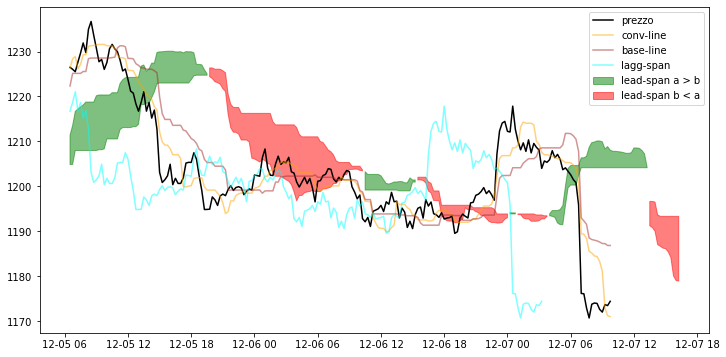

In [5]:
# visualizzazione della Ichimoku Cloud

lead_span_a = candles['lead_span_a']
lead_span_b = candles['lead_span_b']

green = dict(y1=lead_span_a.values, y2=lead_span_b.values, where=lead_span_a > lead_span_b, color='green')
red = dict(y1=lead_span_a.values, y2=lead_span_b.values, where=lead_span_a <= lead_span_b, color='red')
fb = [green, red]

xs = candles.index.values

plt.figure(figsize=(12, 6))

plt.plot(xs, candles['close'], color='black', label='prezzo')

plt.plot(xs, candles['conv_line'], color='orange', alpha=0.5, label='conv-line')
plt.plot(xs, candles['base_line'], color='brown', alpha=0.5, label='base-line')
plt.plot(xs, candles['lagg_span'], color='cyan', alpha=0.5, label='lagg-span')

plt.fill_between(xs, lead_span_a.values, lead_span_b.values, where=lead_span_a > lead_span_b, color='green', alpha=0.5, label='lead-span a > b')
plt.fill_between(xs, lead_span_a.values, lead_span_b.values, where=lead_span_a <= lead_span_b, color='red', alpha=0.5, label='lead-span b < a')

plt.legend()
plt.show()

In [6]:
# ricalcoliamo tutto su un intervallo di tempo più ampio, in modo da avere
# abbastanza dati per implementare una strategia nel passato e validarla

end_date = datetime.now()
start_date = end_date - timedelta(days=30)
candles = HistoricalData(
    ticker='ETH-EUR',
    granularity=900,
    start_date=start_date.strftime('%Y-%m-%d-%H-%M'),
    end_date=end_date.strftime('%Y-%m-%d-%H-%M'),
    verbose=False
).retrieve_data()

new_idxs =[candles.index[-1] + timedelta(minutes=15)]
for _ in range(period_2 - 1):
    new_idxs.append(new_idxs[-1] + timedelta(minutes=15))

candles = candles.reindex(candles.index.to_list() + new_idxs)
candles.tail(period_3)

candles['conv_line'] = (candles['high'].rolling(window=period_1).max() + candles['low'].rolling(window=period_1).min()) / 2
candles['base_line'] = (candles['high'].rolling(window=period_2).max() + candles['low'].rolling(window=period_2).min()) / 2
candles['lead_span_a'] = ((candles['conv_line'] + candles['base_line']) / 2).shift(period_2)
candles['lead_span_b'] = ((candles['high'].rolling(window=period_3).max() + candles['low'].rolling(window=period_3).min()) / 2).shift(period_2)
candles['lagg_span'] = candles['close'].shift(-period_2)

candles = candles[period_3 + period_2:]

Provisional Start: 2022-11-07T11:02:00
Provisional End: 2022-11-10T14:02:00
Provisional Start: 2022-11-10T14:02:00
Provisional End: 2022-11-13T17:02:00
Provisional Start: 2022-11-13T17:02:00
Provisional End: 2022-11-16T20:02:00
Provisional Start: 2022-11-16T20:02:00
Provisional End: 2022-11-19T23:02:00
Provisional Start: 2022-11-19T23:02:00
Provisional End: 2022-11-23T02:02:00
Provisional Start: 2022-11-23T02:02:00
Provisional End: 2022-11-26T05:02:00
Provisional Start: 2022-11-26T05:02:00
Provisional End: 2022-11-29T08:02:00
Provisional Start: 2022-11-29T08:02:00
Provisional End: 2022-12-02T11:02:00
Provisional Start: 2022-12-02T11:02:00
Provisional End: 2022-12-05T14:02:00
Provisional Start: 2022-12-05T14:02:00
Provisional End: 2022-12-08T17:02:00


In [7]:
# implementazione di una strategia
# segnali generati e sfruttati:
# BUY  quando il prezzo è sopra la nuvola creata da Leading Span A e Leading Span B e i prezzi sono sopra la Base-Line
#      oppure la Conversion-Line è sopra la Base-Line
# SELL quando il prezzo è sotto la nuvola creata da Leading Span A e Leading Span B e i prezzi sono sotto la Base-Line
#      oppure la Conversion-Line è sotto la Base-Line

operazioni = []
posizione = 0

for idx, c in candles.iloc[:-(period_2 + 1)].iterrows():
    if posizione == 0:
        if c.close > max(c.lead_span_a, c.lead_span_b) and (c.close > c.base_line or c.conv_line > c.base_line):
            posizione = 1
            operazioni.append([c.name, np.nan, posizione, c.close, np.nan])
        if c.close < min(c.lead_span_a, c.lead_span_b) and (c.close < c.base_line or c.conv_line < c.base_line):
            posizione = -1
            operazioni.append([c.name, np.nan, posizione, c.close, np.nan])
    else:
        if posizione == 1:
            if c.close < min(c.lead_span_a, c.lead_span_b) and (c.close < c.base_line or c.conv_line < c.base_line):
                posizione = 0
                operazioni[-1][1] = c.name
                operazioni[-1][4] = c.close
        else:
            if c.close > max(c.lead_span_a, c.lead_span_b) and (c.close > c.base_line or c.conv_line > c.base_line):
                posizione = 0
                operazioni[-1][1] = c.name
                operazioni[-1][4] = c.close

# chiusura dell'ultima operazione rimasta eventualmente aperta
if np.isnan(operazioni[-1][4]):
    c = candles.iloc[-(period_2 + 1)]
    operazioni[-1][1] = c.name
    operazioni[-1][4] = c.close

In [9]:
wallet = 0.
giocate = 0
vinte = 0
for op in operazioni:
    print(op[0], 'buy @' if op[2] == 1 else 'sell @', op[3], '-->', op[1], 'sell @' if op[2] == 1 else 'buy @', op[4], ' # risultato: {:.4f}'.format((op[4] - op[3]) * op[2]))
    result = (op[4] - op[3]) * op[2]
    wallet += result
    if result > 0:
        vinte += 1
    giocate += 1

print('\nrisultato: {:.4f}'.format(wallet))
print('vinte', vinte, 'su', giocate)

2022-11-08 06:45:00 sell @ 1486.36 --> 2022-11-08 16:00:00 buy @ 1532.92  # risultato: -46.5600
2022-11-08 16:15:00 buy @ 1531.04 --> 2022-11-08 17:45:00 sell @ 1434.4  # risultato: -96.6400
2022-11-08 18:00:00 sell @ 1402.32 --> 2022-11-10 05:00:00 buy @ 1183.51  # risultato: 218.8100
2022-11-10 05:15:00 buy @ 1179.71 --> 2022-11-11 01:30:00 sell @ 1246.8  # risultato: 67.0900
2022-11-11 01:45:00 sell @ 1239.14 --> 2022-11-11 13:15:00 buy @ 1257.93  # risultato: -18.7900
2022-11-11 14:00:00 sell @ 1215.57 --> 2022-11-11 21:15:00 buy @ 1224.36  # risultato: -8.7900
2022-11-11 21:30:00 buy @ 1222.33 --> 2022-11-12 03:30:00 sell @ 1216.17  # risultato: -6.1600
2022-11-12 03:45:00 sell @ 1213.47 --> 2022-11-12 12:30:00 buy @ 1220.63  # risultato: -7.1600
2022-11-12 12:45:00 buy @ 1224.15 --> 2022-11-12 14:00:00 sell @ 1215.22  # risultato: -8.9300
2022-11-12 14:15:00 buy @ 1221.96 --> 2022-11-12 21:00:00 sell @ 1217.0  # risultato: -4.9600
2022-11-12 21:15:00 sell @ 1207.93 --> 2022-11-13